In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# directorios (path) de entrada:
path_in="/content/drive/MyDrive/Maestria/Proyecto Integrador 2/Modelos Finales/Data Set 2 corporate_rating_exo.csv"
data = pd.read_csv(path_in,delimiter=',' )
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2015-11-27,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.049351,7.057088,15.565438,0.058638,3.906655,0.110833,2.0,236.252,5.6,-0.145008
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2014-02-13,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.048857,6.460618,15.914250,0.067239,4.002846,0.098333,3.5,234.719,6.7,0.020161
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2015-03-06,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.044334,10.491970,18.888889,0.074426,3.483510,0.110833,2.0,236.252,5.6,-0.145008
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2012-06-15,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,-0.012858,4.080741,6.901042,0.028394,4.581150,0.120833,4.6,227.223,8.5,0.089855
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,2016-10-24,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.053770,8.293505,15.808147,0.058065,3.857790,0.263750,0.7,237.761,5.0,0.195543


PREPARACION DE DATOS

In [ ]:
data.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

Observamos que el conjunto de datos está muy desequilibrado. Tenemos 671 BBB pero solo 1 D. Sin embargo, estamos trabajando con calificaciones de diferentes compañías como Moody's, Standard & Poor's y más. Se decide simplificar las etiquetas, de acuerdo con el riesgo de clasificación.

In [ ]:
rating_dict = {'AAA':'Lowest Risk',
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk',
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk',
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

data.Rating = data.Rating.map(rating_dict)

Pasamos de 10 etiquetas a 6 etiquetas

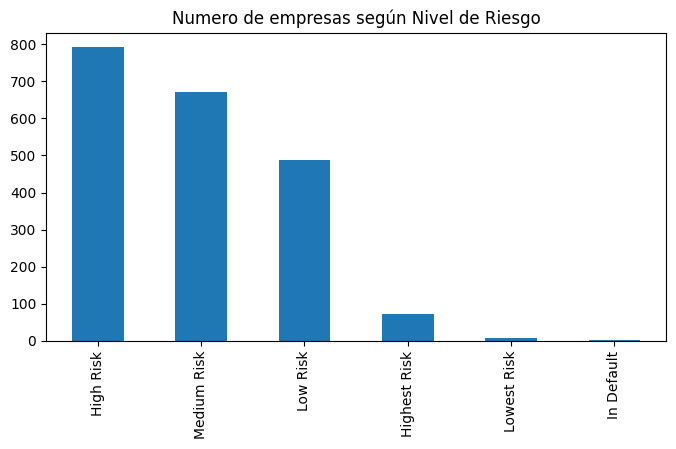

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica
ax = data['Rating'].value_counts().plot(kind='bar',
                                       figsize=(8, 4),
                                       title="Numero de empresas según Nivel de Riesgo")

# Ajustar el color de fondo a blanco
ax.set_facecolor('white')

# Eliminar la cuadrícula
ax.grid(False)

# Mostrar la gráfica
plt.show()


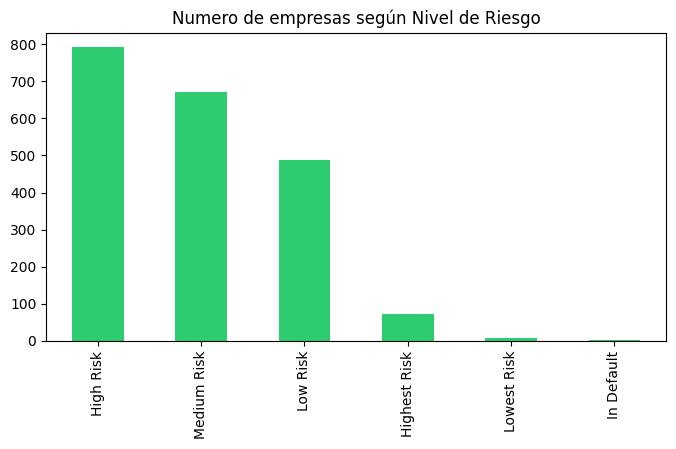

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica con barras de color verde
ax = data['Rating'].value_counts().plot(kind='bar',
                                       figsize=(8, 4),
                                       title="Numero de empresas según Nivel de Riesgo",
                                       color='#2ecc71')  # Código hexadecimal para el color verde

# Ajustar el color de fondo a blanco
ax.set_facecolor('white')

# Eliminar la cuadrícula
ax.grid(False)

# Mostrar la gráfica
plt.show()


Se mantiene  la falta de Calificaciones Crediticias clasificadas como de Menor Riesgo y En Default tendremos que eliminarlas de la tabla.

In [ ]:
data = data[data['Rating']!='Lowest Risk'] # filter Lowest Risk
data = data[data['Rating']!='In Default']  # filter In Default
data.reset_index(inplace = True, drop=True) # reset index

In [ ]:
data.Rating.value_counts()

High Risk       792
Medium Risk     671
Low Risk        487
Highest Risk     71
Name: Rating, dtype: int64

In [ ]:
# Statistical summary con el data set agregado y depurado
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.438715,48.426558,6.540891e+03,1.452142,38.138233,0.147028,2.248095,233.345537,6.670905,0.067018
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,9.002047,530.161001,1.778797e+05,19.521704,760.421855,0.080574,1.529972,4.558714,1.388950,0.156324
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,0.098333,-8.500000,191.700000,5.000000,-0.241552
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.028057,6.235759,2.348851e+00,0.073664,2.202394,0.110833,0.700000,231.221000,5.600000,0.007772
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.087424,9.269746,4.361649e+00,0.132758,5.775840,0.120833,2.000000,234.719000,6.700000,0.058543
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.149355,12.898855,7.322553e+00,0.239359,9.500424,0.123750,3.500000,236.252000,7.900000,0.121537
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,2.281250,4.600000,237.761000,9.900000,0.757353


MODELAMIENTO Y SELECCION DE MEJOR MODELO

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

Preparacion del Data SET

In [ ]:
from sklearn import preprocessing
#codificar las variables categóricas en las columnas 'Sector' y 'Rating'
le = preprocessing.LabelEncoder()
le.fit(data.Sector)
data.Sector = le.transform(data.Sector) # encode sector
le.fit(data.Rating)
data.Rating = le.transform(data.Rating) # encode rating

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Obtener las columnas categóricas y numéricas
#categorical_cols = ['Sector']  # Agrega aquí las columnas categóricas que deseas incluir
#numeric_cols = data.select_dtypes(include=['number']).columns

# Codificar cada columna categórica seleccionada
#label_encoders = {}
#for col in categorical_cols:
    #le = LabelEncoder()
    #data[col] = le.fit_transform(data[col])
    #label_encoders[col] = le

# Crear un DataFrame con solo las columnas seleccionadas
#data = data[numeric_cols.union(categorical_cols + ['Rating'])]






In [ ]:
unique_labels = data['Rating'].unique()
print(unique_labels)

[2 3 0 1]


In [ ]:
data = data.drop('Name', axis=1)
data = data.drop('Symbol', axis=1)
data = data.drop('Rating Agency Name', axis=1)
data = data.drop('Date', axis=1)
data.head()

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
0,2,2,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,...,0.049351,7.057088,15.565438,0.058638,3.906655,0.110833,2.0,236.252,5.6,-0.145008
1,3,2,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,...,0.048857,6.460618,15.914250,0.067239,4.002846,0.098333,3.5,234.719,6.7,0.020161
2,3,2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,...,0.044334,10.491970,18.888889,0.074426,3.483510,0.110833,2.0,236.252,5.6,-0.145008
3,3,2,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,...,-0.012858,4.080741,6.901042,0.028394,4.581150,0.120833,4.6,227.223,8.5,0.089855
4,3,2,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,...,0.053770,8.293505,15.808147,0.058065,3.857790,0.263750,0.7,237.761,5.0,0.195543


Preperacion de Datos y remuestreo de clases

In [ ]:
%pip install catboost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# Definir los modelos
models = {
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(iterations=100, random_state=42)
}

#  datos originales
X = data.drop('Rating', axis=1)
y = data['Rating']

# Inicializar el método de oversampling (SMOTE)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Inicializar StratifiedKFold para la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop sobre los modelos
for model_name, model in models.items():
    print(f"Modelo: {model_name}")

    # Loop sobre las divisiones de la validación cruzada
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplicar SMOTE solo en el conjunto de entrenamiento
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Ajustar el modelo con los datos remuestreados
        model.fit(X_resampled, y_resampled)

        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular y mostrar métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)

         # Almacenar el modelo entrenado
        #trained_models[model_name] = model


        print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
        print('Confusion Matrix:')
        print(conf_matrix)
        print('\n---\n')

    print('\n====================\n')


Modelo: XGBoost
Accuracy: 0.6667, Precision: 0.6653, Recall: 0.6667, F1 Score: 0.6649
Confusion Matrix:
[[114  11  10  23]
 [ 12   2   0   1]
 [ 12   0  72  14]
 [ 27   1  24  82]]

---

Accuracy: 0.6485, Precision: 0.6370, Recall: 0.6485, F1 Score: 0.6387
Confusion Matrix:
[[121   2   7  28]
 [  9   1   1   3]
 [ 12   0  66  20]
 [ 35   0  25  74]]

---

Accuracy: 0.6683, Precision: 0.6687, Recall: 0.6683, F1 Score: 0.6673
Confusion Matrix:
[[114   3   7  34]
 [ 10   4   0   0]
 [  6   1  64  26]
 [ 26   1  20  88]]

---

Accuracy: 0.6634, Precision: 0.6709, Recall: 0.6634, F1 Score: 0.6657
Confusion Matrix:
[[115  12   8  24]
 [ 10   3   1   0]
 [  4   0  58  35]
 [ 19   1  22  92]]

---

Accuracy: 0.6535, Precision: 0.6529, Recall: 0.6535, F1 Score: 0.6519
Confusion Matrix:
[[108   5  14  32]
 [ 10   4   0   0]
 [  4   0  70  23]
 [ 28   0  24  82]]

---



Modelo: Gradient Boosting
Accuracy: 0.6173, Precision: 0.6233, Recall: 0.6173, F1 Score: 0.6190
Confusion Matrix:
[[106  12  12

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.2772, Precision: 0.3716, Recall: 0.2772, F1 Score: 0.2230
Confusion Matrix:
[[12 32 84 31]
 [ 6  2  2  4]
 [ 4  6 79  8]
 [ 2 14 99 19]]

---



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.2847, Precision: 0.4223, Recall: 0.2847, F1 Score: 0.2278
Confusion Matrix:
[[ 16  41  84  18]
 [  3   7   1   3]
 [  2   9  79   7]
 [  5  15 101  13]]

---



Modelo: KNN
Accuracy: 0.4321, Precision: 0.4822, Recall: 0.4321, F1 Score: 0.4385
Confusion Matrix:
[[65 24 31 38]
 [ 3  8  1  3]
 [12  8 63 15]
 [29 21 45 39]]

---

Accuracy: 0.4975, Precision: 0.5365, Recall: 0.4975, F1 Score: 0.5051
Confusion Matrix:
[[83 21 30 24]
 [ 6  1  3  4]
 [15  4 66 13]
 [31  7 45 51]]

---

Accuracy: 0.4678, Precision: 0.5008, Recall: 0.4678, F1 Score: 0.4689
Confusion Matrix:
[[78 23 29 28]
 [ 4  6  4  0]
 [12  2 64 19]
 [36  9 49 41]]

---

Accuracy: 0.4926, Precision: 0.5407, Recall: 0.4926, F1 Score: 0.4985
Confusion Matrix:
[[72 26 29 32]
 [ 6  3  4  1]
 [15  3 73  6]
 [28 10 45 51]]

---

Accuracy: 0.4777, Precision: 0.5168, Recall: 0.4777, F1 Score: 0.4808
Confusion Matrix:
[[76 19 38 26]
 [ 5  7  0  2]
 [ 9  4 64 20]
 [32  9 47 46]]

---



Modelo: CatBoost
Learning rate set to 

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Learning rate set to 0.5
0:	learn: 1.1765622	total: 23.1ms	remaining: 2.28s
1:	learn: 1.0341764	total: 41.3ms	remaining: 2.02s
2:	learn: 0.9698645	total: 58.4ms	remaining: 1.89s
3:	learn: 0.9067080	total: 75.1ms	remaining: 1.8s
4:	learn: 0.8679632	total: 92ms	remaining: 1.75s
5:	learn: 0.8306912	total: 109ms	remaining: 1.71s
6:	learn: 0.8009360	total: 126ms	remaining: 1.68s
7:	learn: 0.7707830	total: 143ms	remaining: 1.64s
8:	learn: 0.7517141	total: 159ms	remaining: 1.61s
9:	learn: 0.7304990	total: 176ms	remaining: 1.58s
10:	learn: 0.7102311	total: 193ms	remaining: 1.56s
11:	learn: 0.6859772	total: 218ms	remaining: 1.6s
12:	learn: 0.6640795	total: 235ms	remaining: 1.57s
13:	learn: 0.6440966	total: 252ms	remaining: 1.55s
14:	learn: 0.6312365	total: 269ms	remaining: 1.52s
15:	learn: 0.6128087	total: 286ms	remaining: 1.5s
16:	learn: 0.5940669	total: 303ms	remaining: 1.48s
17:	learn: 0.5752623	total: 320ms	remaining: 1.46s
18:	learn: 0.5643873	total: 338ms	remaining: 1.44s
19:	learn: 0.546

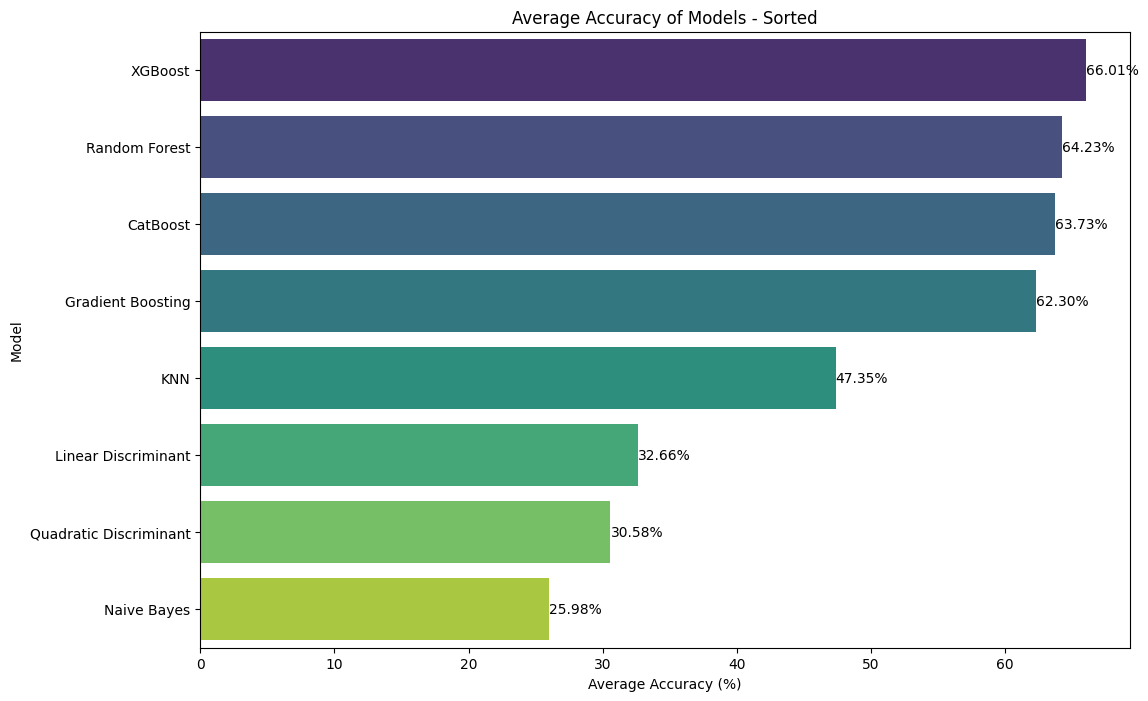

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista para almacenar los resultados
results_list = []

# Loop sobre los modelos y calcular el accuracy promedio
for model_name, model in models.items():
    accuracies = []

    # Loop sobre las divisiones de la validación cruzada
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Aplicar SMOTE solo en el conjunto de entrenamiento
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Ajustar el modelo con los datos remuestreados
        model.fit(X_resampled, y_resampled)

        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular y almacenar el accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Calcular el accuracy promedio para este modelo
    avg_accuracy = sum(accuracies) / len(accuracies)

    # Almacenar el nombre del modelo y su accuracy promedio
    results_list.append({'Model': model_name, 'Average Accuracy': avg_accuracy * 100})

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results_list)

# Ordenar el DataFrame por el accuracy de mayor a menor
df_results_sorted = df_results.sort_values(by='Average Accuracy', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average Accuracy', y='Model', data=df_results_sorted, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Average Accuracy (%)')
plt.ylabel('Model')
plt.title('Average Accuracy of Models - Sorted')

# Añadir el porcentaje en cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

plt.show()


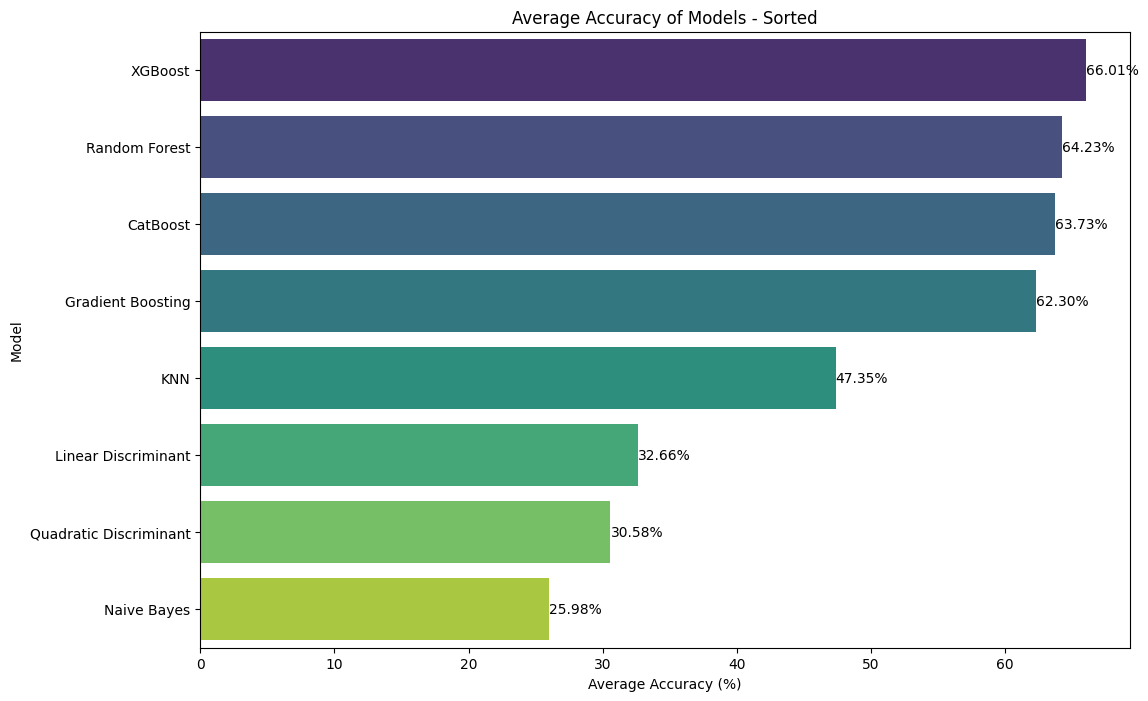

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average Accuracy', y='Model', data=df_results_sorted, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Average Accuracy (%)')
plt.ylabel('Model')
plt.title('Average Accuracy of Models - Sorted')

# Añadir el porcentaje en cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Supongamos que X_train, X_test, y_train, y_test ya están definidos

# Crear e ajustar el modelo XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_xgb.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Métricas de clasificación
class_report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)


Matriz de Confusión:
[[113   3  11  32]
 [ 12   1   0   1]
 [  6   0  64  27]
 [ 31   0  17  86]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       159
           1       0.25      0.07      0.11        14
           2       0.70      0.66      0.68        97
           3       0.59      0.64      0.61       134

    accuracy                           0.65       404
   macro avg       0.56      0.52      0.53       404
weighted avg       0.65      0.65      0.65       404



INTERPRETABILIDAD

In [ ]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.5 MB/s eta 0:00:00


[22:22:02] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[22:22:03] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


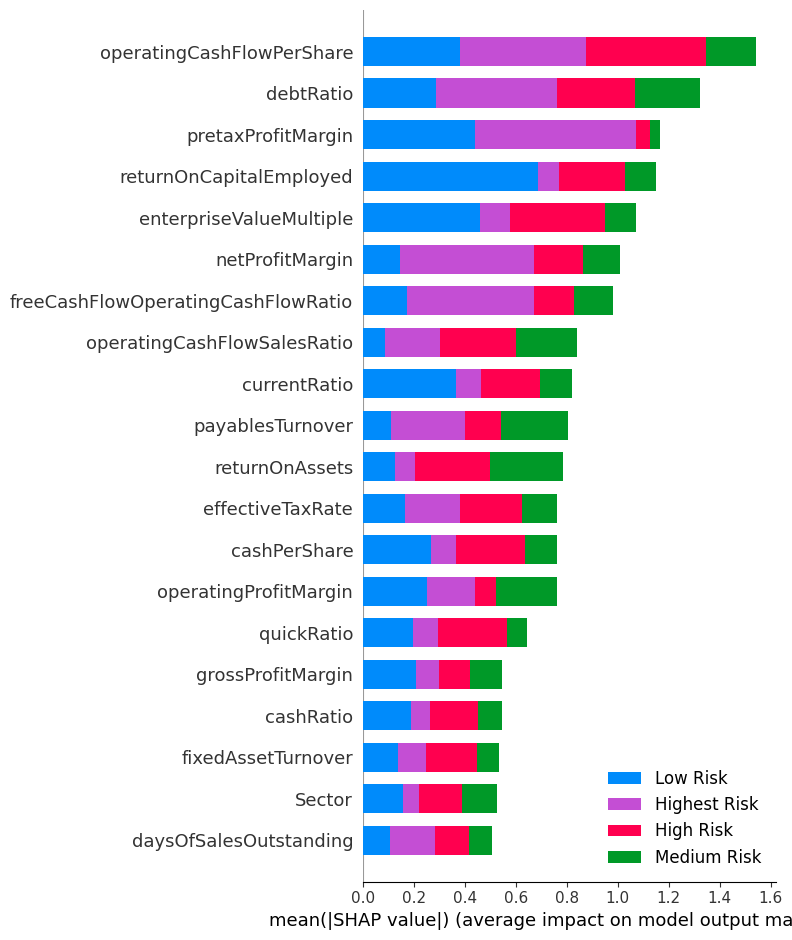

In [ ]:
import shap
import matplotlib.pyplot as plt

# Crear un explainer con tu modelo entrenado
explainer = shap.Explainer(model_xgb)

# Calcular los valores SHAP para tus datos de prueba
shap_values = explainer.shap_values(X_test)

# Obtener las etiquetas originales
original_labels = {
    0: 'High Risk',
    1: 'Highest Risk',
    2: 'Low Risk',
    3: 'Medium Risk'
}

# Crear el gráfico SHAP con un ancho mayor
plt.figure(figsize=(20, 15))
shap.summary_plot(shap_values, X_test, class_names=list(original_labels.values()), show=False)

plt.show()


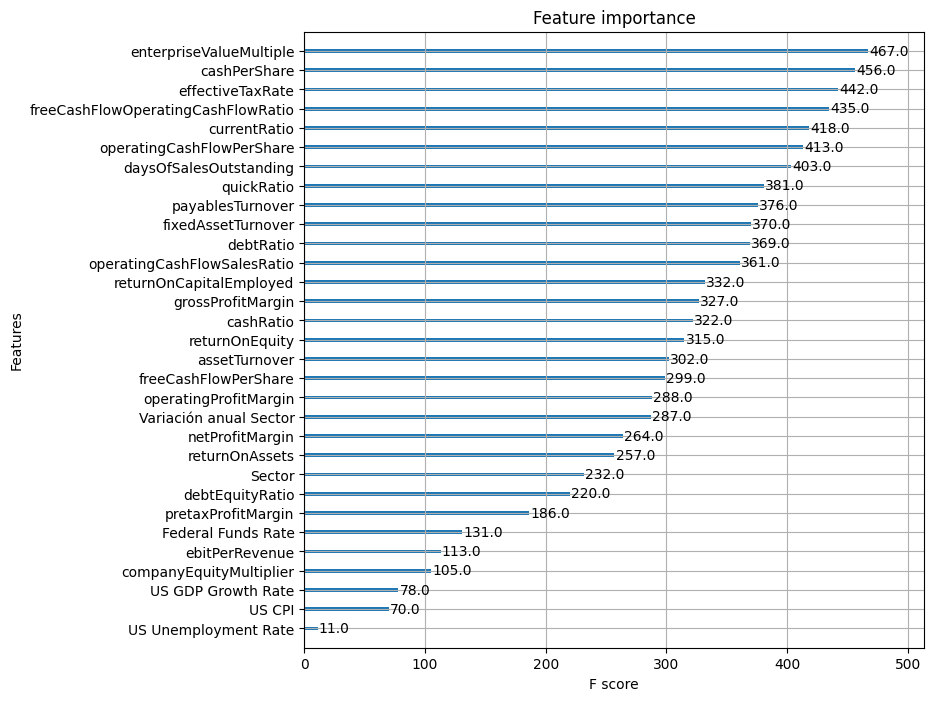

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))
# xgboost.plot_importance(..., ax=ax)

plot_importance(model_xgb, ax=ax)
plt.show()